In [6]:
import random
import math
import matplotlib.pyplot as plt
# Inisialisasi data
data = [[1, 2], [2, 1], [2, 3], [3, 2], [6, 5], [7, 5], [5, 6], [7, 6]]

# Inisialisasi jumlah cluster
k = 2

# Inisialisasi centroid awal secara acak
centroids = []
for i in range(k):
    centroids.append(random.choice(data))

# Fungsi untuk menghitung jarak Euclidean
def euclidean_distance(point1, point2):
    distance = 0
    for i in range(len(point1)):
        distance += (point1[i] - point2[i])**2
    return math.sqrt(distance)

# Fungsi untuk mengelompokkan data ke dalam cluster
def assign_cluster(data, centroids):
    clusters = {}
    for point in data:
        min_distance = float('inf')
        for i in range(len(centroids)):
            distance = euclidean_distance(point, centroids[i])
            if distance < min_distance:
                min_distance = distance
                cluster_id = i
        if cluster_id in clusters:
            clusters[cluster_id].append(point)
        else:
            clusters[cluster_id] = [point]
    return clusters

# Fungsi untuk memperbarui posisi centroid
def update_centroids(clusters):
    centroids = []
    for cluster_id in clusters:
        centroid = []
        for i in range(len(clusters[cluster_id][0])):
            centroid.append(sum([point[i] for point in clusters[cluster_id]]) / len(clusters[cluster_id]))
        centroids.append(centroid)
    return centroids

# Fungsi untuk memeriksa apakah centroid telah konvergen
def has_converged(old_centroids, centroids):
    for i in range(len(centroids)):
        if euclidean_distance(old_centroids[i], centroids[i]) > 0:
            return False
    return True

# Algoritma k-Means
while True:
    clusters = assign_cluster(data, centroids)
    new_centroids = update_centroids(clusters)
    if has_converged(centroids, new_centroids):
        break
    centroids = new_centroids

# Cetak hasil cluster
for cluster_id in clusters:
    print(f"Cluster {cluster_id+1}: {clusters[cluster_id]}")

Cluster 1: [[1, 2], [2, 1], [2, 3], [3, 2]]
Cluster 2: [[6, 5], [7, 5], [5, 6], [7, 6]]


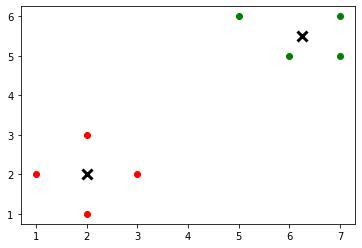

In [7]:
# Plot hasil cluster
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']
for cluster_id in clusters:
    for point in clusters[cluster_id]:
        plt.scatter(point[0], point[1], color=colors[cluster_id])
for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], marker='x', s=100, linewidths=3, color='black')
plt.show()